In [41]:
from scipy.io import loadmat 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [42]:
mnist_raw = loadmat("datasets/mnist-original.mat")
mnist = {
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

In [43]:
x_train, x_test = mnist["data"][:60000], mnist["data"][60001:70000]
y_train, y_test = mnist["target"][:60000], mnist["target"][60001:70000]

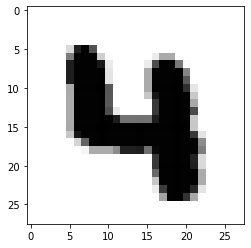

In [44]:
#จะดูว่า ตำแหน่งที่5000 อยู่ในclass0 หรือไม่
#เลือกตำแหน่งที่จะtest
predict_number = 5000  
plt.imshow(x_test[predict_number].reshape(28,28),cmap=plt.cm.binary,interpolation="nearest")

In [45]:
#จะดูว่า ตำแหน่งที่5000 อยู่ในclass0 หรือไม่
#สร้างclass0
y_train_0 = (y_train==0)
y_test_0 = (y_test==0)

In [46]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_0)

SGDClassifier()

In [47]:
#ตอบ False เพราะ 4 ไม่ได้อยู่ในกลุ่ม 0
print("Actually = ",y_test[predict_number])
print( sgd_clf.predict([x_test[predict_number]])[0] )

Actually =  4.0
False


Actually =  0.0
True


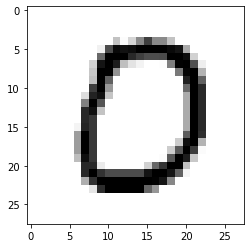

In [48]:
#ตอบ True เพราะ 0 อยู่ในกลุ่ม 0
predict_number = 0
plt.imshow(x_test[predict_number].reshape(28,28),cmap=plt.cm.binary,interpolation="nearest")
print("Actually = ",y_test[predict_number])
print( sgd_clf.predict([x_test[predict_number]])[0] )

In [49]:
#cross-validation test ได้เฉพาะscore
score = cross_val_score(sgd_clf,x_train,y_train_0,cv=3,scoring="accuracy")
print(score)

[0.957   0.96745 0.97795]


In [50]:
#confusion-matrix test ได้ผลการทดลอง
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_0,cv=3)
cm = confusion_matrix(y_train_0,y_train_pred)
print(cm)

[[51629  2448]
 [  263  5660]]


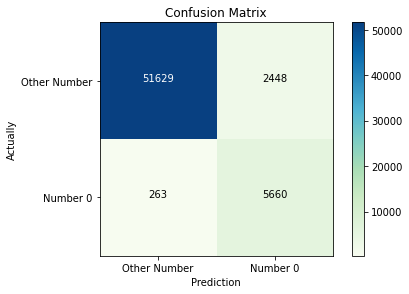

In [51]:
def displayConfusionMatrix(cm,cmap=plt.cm.GnBu):
    classes=["Other Number","Number 0"]
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    trick_marks=np.arange(len(classes))
    plt.xticks(trick_marks,classes)
    plt.yticks(trick_marks,classes)
    thresh=cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),
        horizontalalignment='center',
        color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Actually')
    plt.xlabel('Prediction')
    plt.show()

plt.figure()
displayConfusionMatrix(cm)

In [54]:
y_test_pred = sgd_clf.predict(x_test)

classes=['Other Number','Number 0']
print(classification_report(y_test_0,y_test_pred,target_names=classes))
print("Accuracy Score = ",accuracy_score(y_test_0,y_test_pred)*100) #[(tp+tn)/total*100]

              precision    recall  f1-score   support

Other Number       1.00      0.99      0.99      9020
    Number 0       0.92      0.97      0.94       979

    accuracy                           0.99      9999
   macro avg       0.96      0.98      0.97      9999
weighted avg       0.99      0.99      0.99      9999

Accuracy Score =  98.87988798879887
